In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [4]:
# Load the dataset
df = pd.read_excel('tourism.xlsx')

# Display the first few rows of the dataframe to understand its structure
df.head()

,Total Tourist Arrivals,Tourist Earnings (USD Millions),Month
0,219360,406.81,2017-Jan
1,197517,366.30,2017-Feb
2,188076,348.79,2017-Mar
3,160249,297.19,2017-Apr
4,121891,226.05,2017-May


In [5]:
# Convert 'Month' to datetime
df['Month'] = pd.to_datetime(df['Month'])

/var/folders/xp/lyh7b4z17j191_kdj78g_wg80000gn/T/ipykernel_61642/4186974762.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Month'])


In [6]:
# Display the first few rows of the dataframe to understand its structure
print(df.head())

   Total Tourist Arrivals  Tourist Earnings (USD Millions)      Month
0                  219360                           406.81 2017-01-01
1                  197517                           366.30 2017-02-01
2                  188076                           348.79 2017-03-01
3                  160249                           297.19 2017-04-01
4                  121891                           226.05 2017-05-01


In [7]:
# Checking column data types
column_types = df.dtypes
print(column_types)

Total Tourist Arrivals                      int64
Tourist Earnings (USD Millions)           float64
Month                              datetime64[ns]
dtype: object


In [8]:
# Checking for null values
null_values = df.isnull().sum()

print(null_values)

Total Tourist Arrivals             0
Tourist Earnings (USD Millions)    0
Month                              0
dtype: int64


### Plot Data

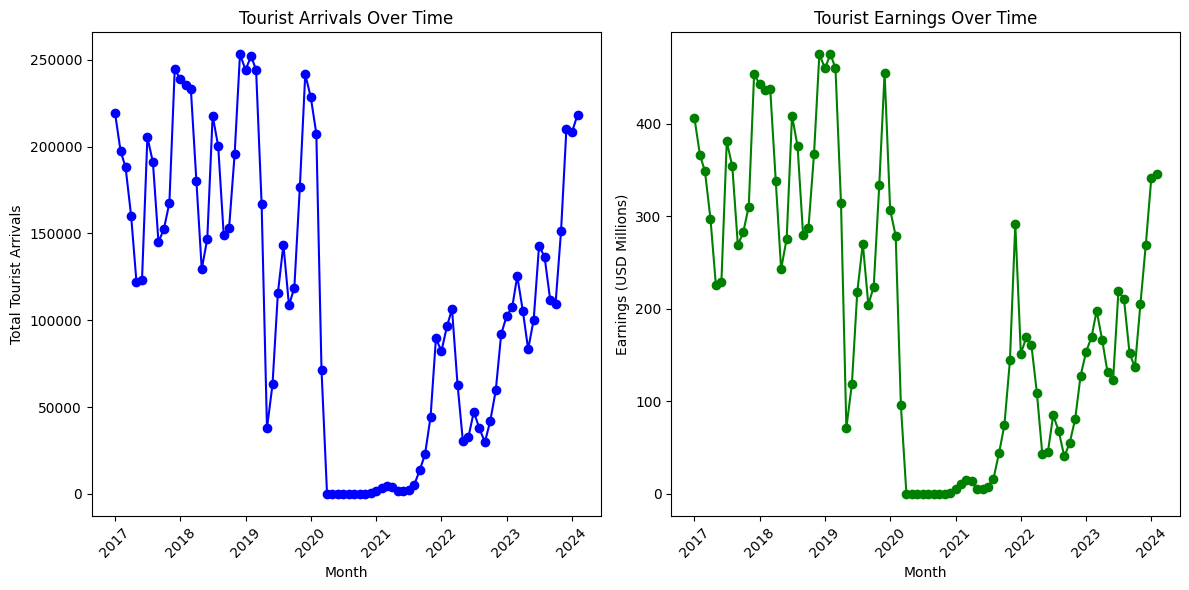

In [9]:
# Set the figure size and background color
plt.figure(figsize=(12, 6), facecolor='white')

# Plotting tourist arrivals
plt.subplot(1, 2, 1)
plt.plot(df['Month'], df['Total Tourist Arrivals'], marker='o', linestyle='-', color='blue')
plt.title('Tourist Arrivals Over Time')
plt.xlabel('Month')
plt.ylabel('Total Tourist Arrivals')
plt.xticks(rotation=45)

# Plotting tourist earnings
plt.subplot(1, 2, 2)
plt.plot(df['Month'], df['Tourist Earnings (USD Millions)'], marker='o', linestyle='-', color='green')
plt.title('Tourist Earnings Over Time')
plt.xlabel('Month')
plt.ylabel('Earnings (USD Millions)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [10]:
# Calculate the Pearson correlation coefficient between 'Total Tourist Arrivals' and 'Tourist Earnings (USD Millions)'
correlation_coefficient, p_value = stats.pearsonr(df['Total Tourist Arrivals'], df['Tourist Earnings (USD Millions)'])

print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
print(f'P-value: {p_value:.2e}')

Correlation Coefficient: 0.98
P-value: 3.87e-58


### Are there any outliers in the data that could affect the correlation

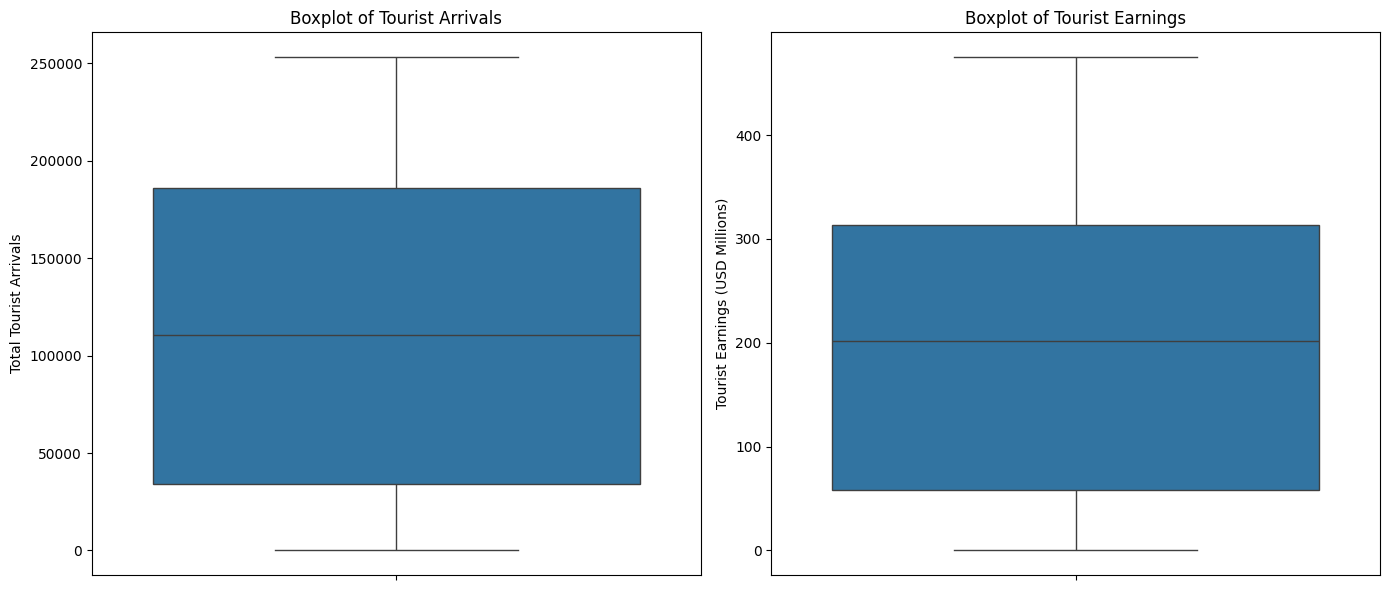

In [11]:
# Set the figure size and background color
plt.figure(figsize=(14, 6), facecolor='white')

# Plotting boxplots to identify outliers
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Total Tourist Arrivals'])
plt.title('Boxplot of Tourist Arrivals')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Tourist Earnings (USD Millions)'])
plt.title('Boxplot of Tourist Earnings')

plt.tight_layout()
plt.show()

In [12]:
# Cross tab
total_arrivals_2022 = df[df['Month'].dt.year == 2022]['Total Tourist Arrivals'].sum()
total_arrivals_2023 = df[df['Month'].dt.year == 2023]['Total Tourist Arrivals'].sum()

total_earnings_2022 = df[df['Month'].dt.year == 2022]['Tourist Earnings (USD Millions)'].sum()
total_earnings_2023 = df[df['Month'].dt.year == 2023]['Tourist Earnings (USD Millions)'].sum()

# Creating a crosstab of the totals
totals_df = pd.DataFrame({
    'Year': ['2022', '2023'],
    'Total Tourist Arrivals': [total_arrivals_2022, total_arrivals_2023],
    'Total Earnings (USD Millions)': [total_earnings_2022, total_earnings_2023]
})

totals_df.set_index('Year', inplace=True)
totals_df



,Total Tourist Arrivals,Total Earnings (USD Millions)
Year,,
2022,719978,1136.2
2023,1487303,2135.4


In [15]:
# Calculating the percentage growth
percentage_growth_arrivals = ((total_arrivals_2023 - total_arrivals_2022) / total_arrivals_2022) * 100
percentage_growth_earnings = ((total_earnings_2023 - total_earnings_2022) / total_earnings_2022) * 100

percentage_growth_arrivals, percentage_growth_earnings

(106.57617316084658, 87.94226368597077)

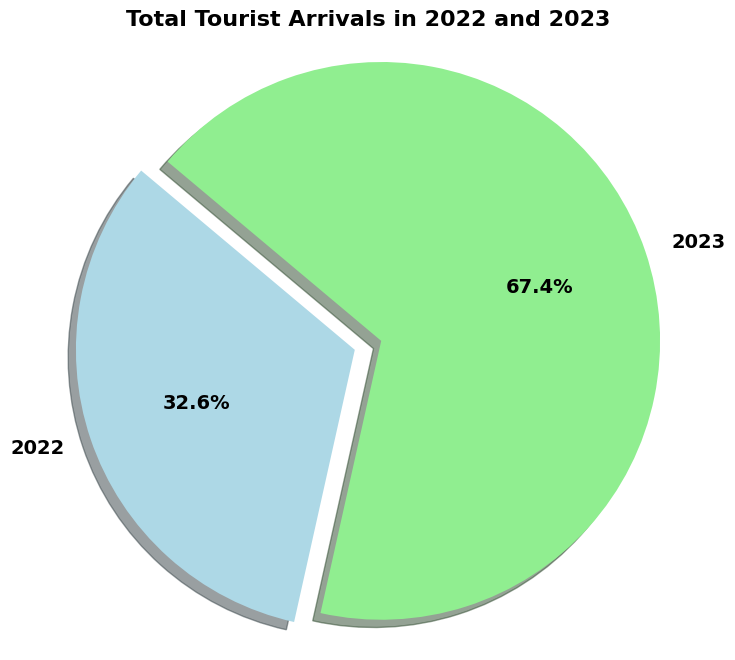

In [13]:
# pie chart with bold percentages

labels = ['2022', '2023']
sizes = [total_arrivals_2022, total_arrivals_2023]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. '2023')

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('Total Tourist Arrivals in 2022 and 2023', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


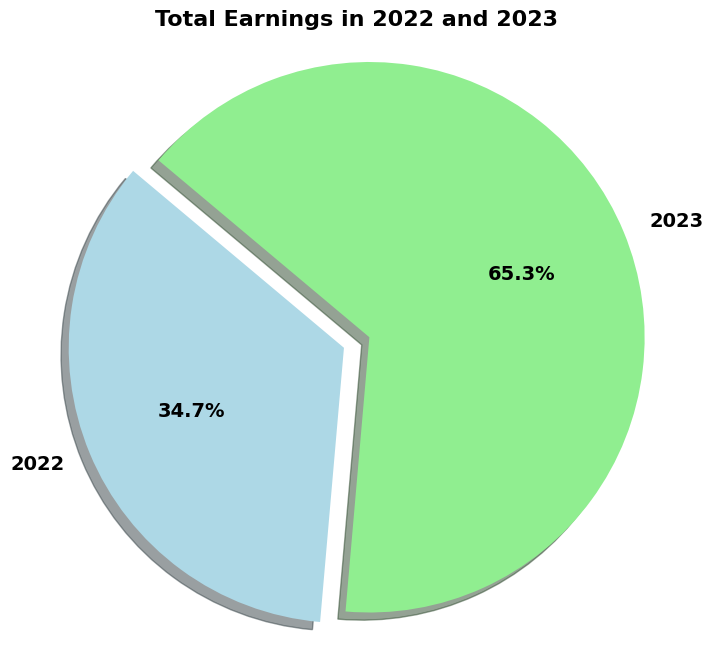

In [14]:
# pie chart with bold percentages

labels = ['2022', '2023']
sizes = [total_earnings_2022, total_earnings_2023]
colors = ['lightblue', 'lightgreen']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. '2023')

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': 14, 'weight': 'bold'})
plt.title('Total Earnings in 2022 and 2023', fontsize=16, weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()